## Working with SQL

Hemant Thapa

In [1]:
import sqlite3 as sql

### 1.Introduction

Structured Query Language (SQL) is a database language that is composed of
commands that enable users to create databases or table structures, perform
various types of data manipulation and data administration as well as query the
database to extract useful information. SQL is supported by all relational DBMS
software. SQL is portable, which means that a user does not have to relearn the
basics when moving from one RDBMS to another because all RDBMSs will use
SQL in almost the same way.
SQL is easy to learn since its vocabulary is relatively simple. Its basic command set
has a vocabulary of fewer than 100 words. It is also a non-procedural language,
which means that the user specifies what must be done and not how it is to be
done. Users do not need to know the physical data storage format or the complex
activities that take place when a SQL command is executed in order to issue a
command.
According to Rob and Coronel (2009), SQL functions fit into two general categories:
1. SQL is a data definition language (DDL): it includes commands that allow
one to define or create database objects (such as tables, indexes and views).
SQL also includes commands to define access rights to the database objects
created.
2. SQL is a data manipulation language (DML): it includes commands that
allow one to manipulate the data stored in the database. For example,
commands to insert, update, delete and retrieve data

### 2. SQL data definition commands

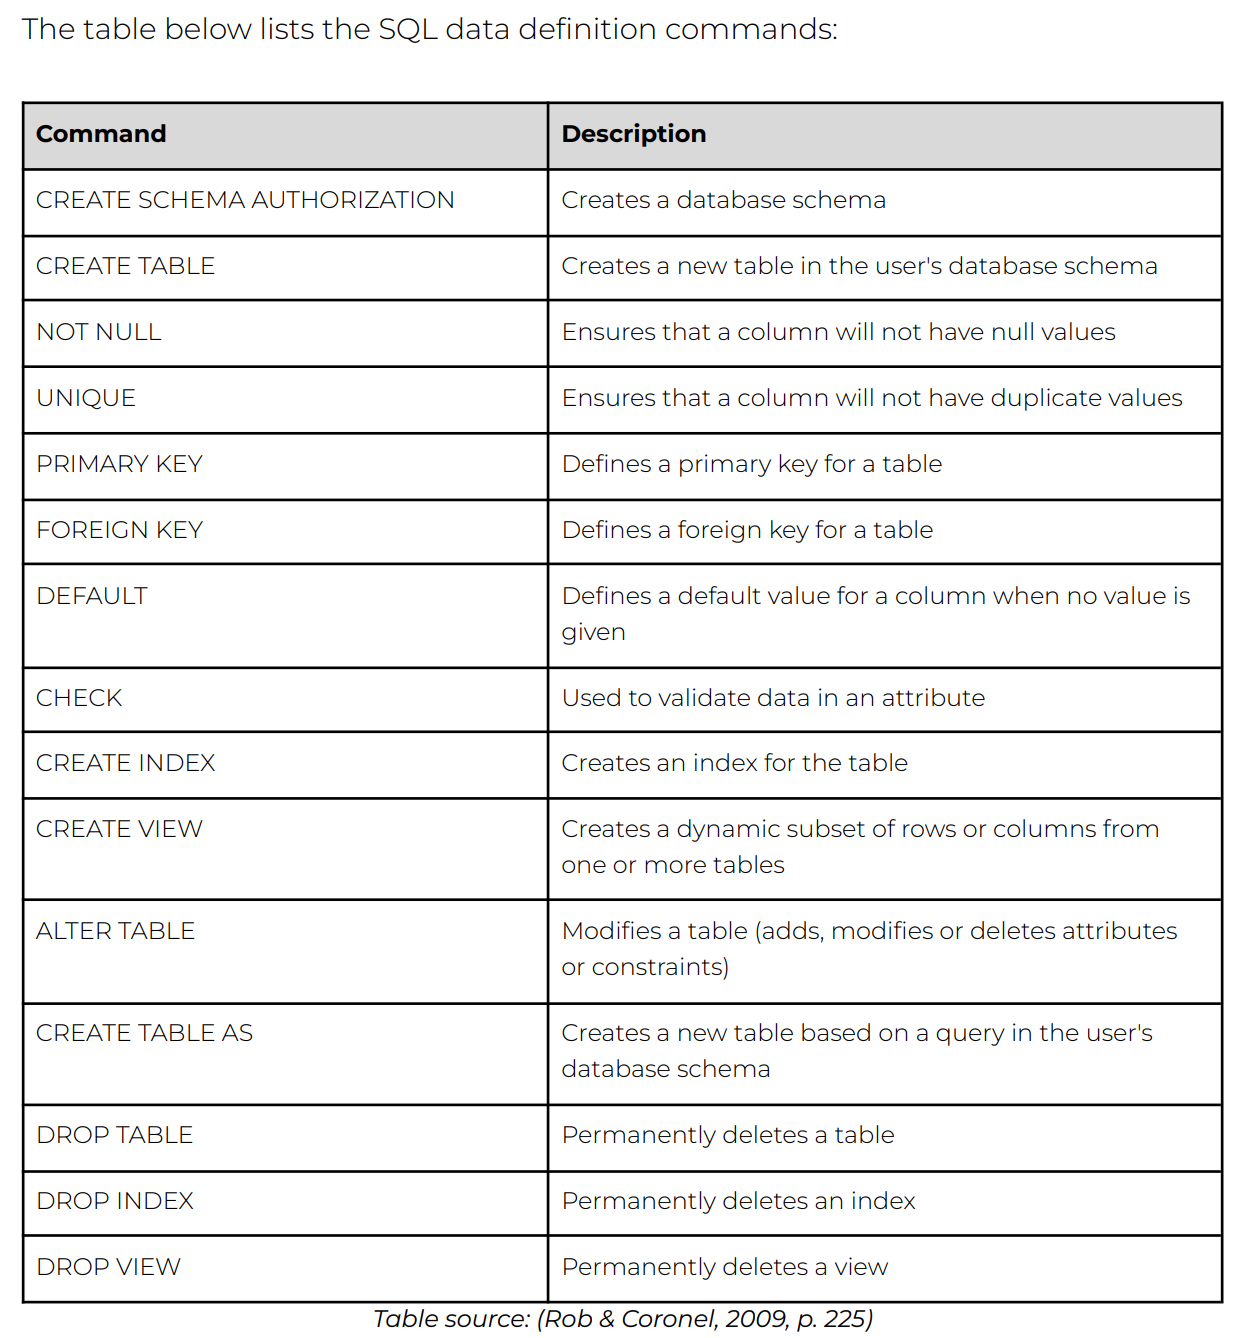

### 3. SQL data manipulation commands

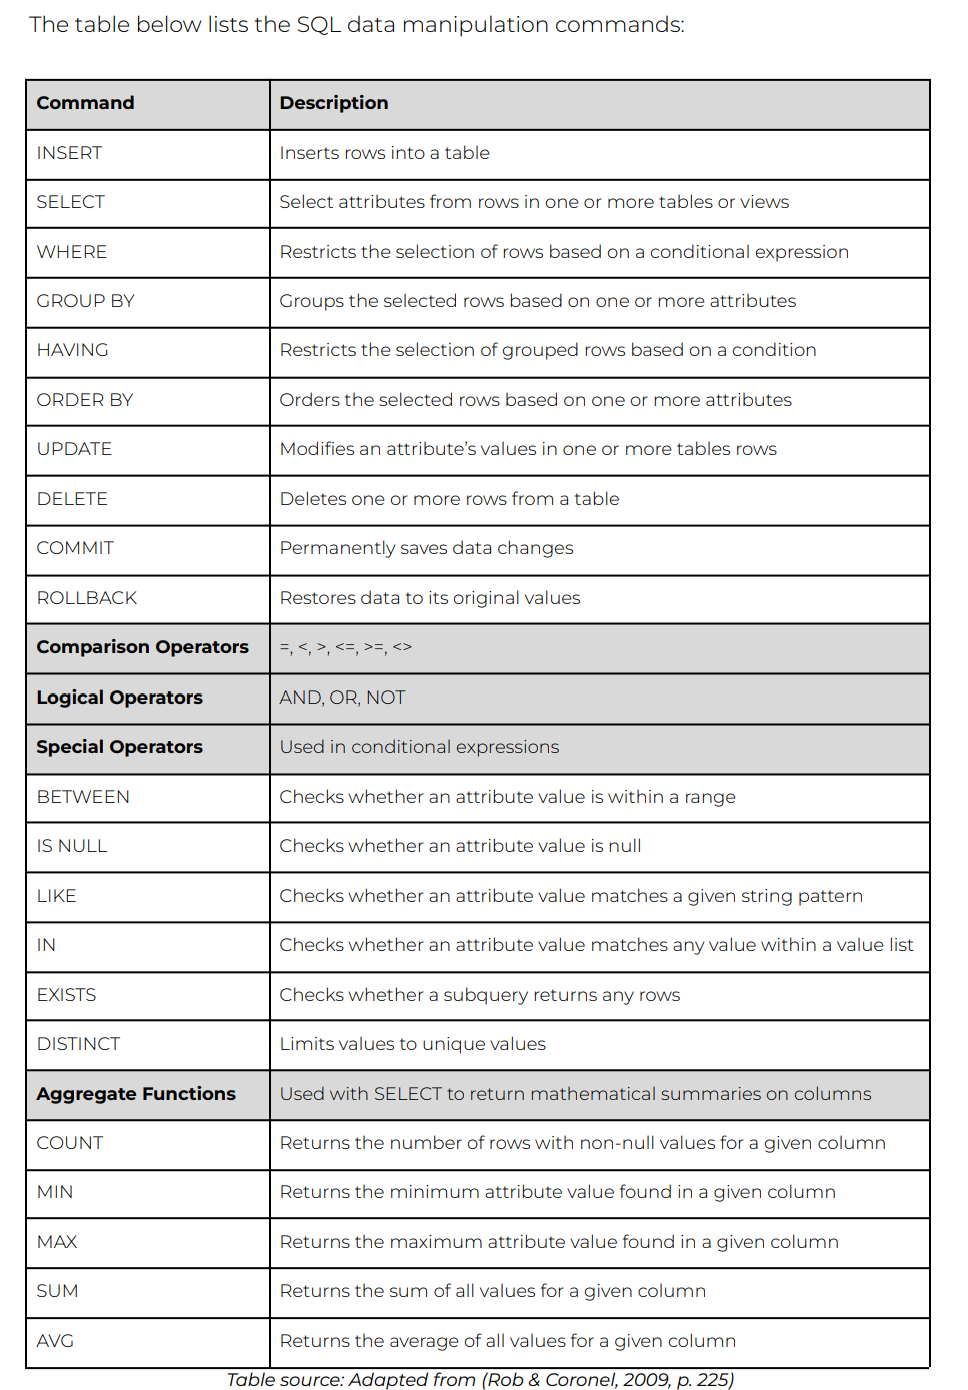

### 4. Python SQLite Module

 4.1 Creating a database

In [2]:
#Creating or open a file
database = sql.connect('mydatabase.db')

# Create a cursor object
cursor = database.cursor()

In [3]:
database

In [4]:
cursor

4.2 Creating Tables

In [5]:
query = "CREATE TABLE students(id INTEGER PRMARY KET, name, TEXT, grade INTEGER)"
cursor.execute(query)
database.commit()

To make any changes to the database, we need a cursor object. A cursor object is
an object that is used to execute SQL statements. Next, .commit is used to save
changes to the database. It is important to remember to commit changes since
this ensures the atomicity of the database. If you close the connection using close
or the connection to the file is lost, changes that have not been committed will be
lost.


4.3 Inserting into Database

In [6]:
name1 = 'Andres'
grade1 = 60

name2 = 'John'
grade2 = 90

In [7]:
#Inserting student one

cursor.execute('''INSERT INTO students(name, grade) VALUES(?,?)''', (name1,grade1))
print('First user inserted')

First user inserted


In [8]:
#Inserting student two

cursor.execute('''INSERT INTO students(name, grade)VALUES(?,?)''', (name2,grade2))
print('Second user inserted')
database.commit()

Second user inserted


##### In the example below, the values of the Python variables are passed inside a tuple (you could also use a dictionary):


In [9]:
name3 = 'Shelia'
grade3 = 70
cursor.execute('''INSERT INTO students(name, grade)
                    VALUES(:name,:grade)''',
              {'name':name3, 'grade':grade3})

##### If you need to insert several users, use executemany and a list with the tuples:

In [10]:
students_=[(name1,grade1),(name2,grade2),(name3,grade3)]
cursor.executemany('''INSERT INTO students(name,grade) VALUES(?,?)''',students_)
database.commit()

##### If you need to get the id of the row you just inserted, use lastrowid:


In [11]:
id = cursor.lastrowid
print('Last row id: %d'% id)

Last row id: 3


##### Use rollback to roll back any change to the database since the last call to commit

In [12]:
cursor.execute('''UPDATE students SET grade = ? WHERE id = ? ''', (65, 2))
# The user's phone is not updated
database.rollback()

4.4 Retrieving Data

To retrieve data, execute a SELECT SQL statement against the cursor object and
then use fetchone() to retrieve a single row or fetchall() to retrieve all the rows.

In [13]:
id = 3
cursor.execute('''SELECT name, grade FROM students WHERE id=?''', (id,))
student = cursor.fetchone()
print(student)

None


The cursor object works as an iterator, invoking fetchall() automatically:

In [14]:
cursor.execute('''SELECT name, grade FROM students''')
for row in cursor:
# row[0] returns the first column in the query (name), row[1] returns email column.
    print(f'{row[0]} : {row[1]}')

Andres : 60
John : 90
Shelia : 70
Andres : 60
John : 90
Shelia : 70


4.5 Updating and Deleting Data


Updating or deleting data is practically the same as inserting data:

In [15]:
# Update user with id 1
grade = 100
id = 1
cursor.execute('''UPDATE students SET grade = ? WHERE id = ? ''', (grade,id))
# Delete user with id 2
id = 2
cursor.execute('''DELETE FROM students WHERE id = ? ''', (id,))
cursor.execute('''DROP TABLE students''')
database.commit()

In [17]:
database.close()

In [23]:
try:
    # Creates or opens a file called student_db with a SQLite3 DB
    db = sql.connect('mydatabase.db')
    # Get a cursor object
    cursor = db.cursor()
    # Check if table users does not exist and create it
    cursor.execute('''CREATE TABLE IF NOT EXISTS
    java_programming(id INTEGER PRIMARY KEY, name TEXT,
    grade INTEGER)''')
    # Commit the change
    db.commit()
except Exception as e:
    # Roll back any change if something goes wrong
    db.rollback()
    raise e
finally:
    # Close the db connection
    db.close()

https://docs.python.org/2.5/lib/sqlite3-Cursor-Objects.html